In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
import pandas as pd

In [0]:
import numpy as np

In [0]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np
import random
import pickle
from collections import Counter
from os import listdir
from os.path import isfile, join
import pandas as pd

In [0]:
"!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip"

'!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip'

In [0]:
%%bash
ls
# unzip "sentiment labelled sentences.zip"
head "sentiment labelled sentences/amazon_cells_labelled.txt"
ls

__MACOSX
sample_data
sentiment labelled sentences
sentiment labelled sentences.zip
sentiment labelled sentences.zip.1
wiki.en.align.vec
So there is no way for me to plug it in here in the US unless I go by a converter.	0
Good case, Excellent value.	1
Great for the jawbone.	1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0
The mic is great.	1
I have to jiggle the plug to get it to line up right to get decent volume.	0
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0
If you are Razr owner...you must have this!	1
Needless to say, I wasted my money.	0
What a waste of money and time!.	0
__MACOSX
sample_data
sentiment labelled sentences
sentiment labelled sentences.zip
sentiment labelled sentences.zip.1
wiki.en.align.vec


In [0]:
df = pd.read_csv("sentiment labelled sentences/amazon_cells_labelled.txt", delimiter="\t", header=None)
df.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [0]:
df.columns = ["text", "label"]
df.head()

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [0]:
sentences = df['text'].values
y = df['label'].values

In [0]:
sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.25, random_state=1000)

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [0]:
X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

In [0]:
print('Accuracy', score)

Accuracy 0.796


In [0]:
from keras.models import Sequential
from keras import layers

Using TensorFlow backend.


In [0]:
input_dim = X_train.shape[1]

In [0]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                15470     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 15,481
Trainable params: 15,481
Non-trainable params: 0
_________________________________________________________________


In [0]:
epochs = 100
batch_size = 10

history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_test, y_test),
                    batch_size=batch_size)

Train on 750 samples, validate on 250 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/step - loss: 0.6848 - acc: 0.5893 - val_loss: 0.6672 - val_acc: 0.6680
Epoch 2/100
750/750 [==============================] - 0s 635us/step - loss: 0.6166 - acc: 0.8453 - val_loss: 0.6157 - val_acc: 0.7720
Epoch 3/100
750/750 [==============================] - 0s 628us/step - loss: 0.5176 - acc: 0.9080 - val_loss: 0.5549 - val_acc: 0.7600
Epoch 4/100
750/750 [==============================] - 0s 619us/step - loss: 0.4084 - acc: 0.9493 - val_loss: 0.5070 - val_acc: 0.7800
Epoch 5/100
750/750 [==============================] - 0s 651us/step - loss: 0.3163 - acc: 0.9707 - val_loss: 0.4698 - val_acc: 0.7880
Epoch 6/100
750/750 [==============================] - 0s 619us/step - loss: 0.2444 - acc: 0.9787 - val_loss: 0.4510 - val_acc: 0.7920
Epoch 7/100
750/750 [==============================] - 0s 649us/step - loss: 0.1916 - acc: 0.9880 - val_loss: 0.4376 - val_acc: 0.7960
Epoch 8/100

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [0]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

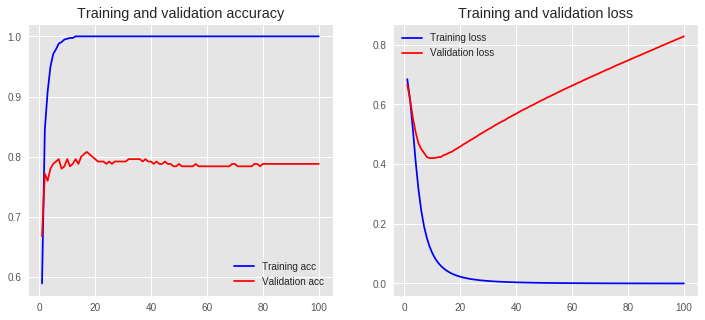

In [0]:
plot_history(history)

In [0]:
from keras.preprocessing.text import Tokenizer

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

In [0]:
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

In [0]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

1574


In [0]:
print(sentences_train[2])

Was not happy.


In [0]:
print(X_train[2])

[17, 13, 86]


In [0]:
from keras.preprocessing.sequence import pad_sequences

In [0]:
maxlen = 100

In [0]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [0]:
print(X_train[0, :])

[  7  24   5  16   4 137 148   6 223 315   2  71 224   8   1 673 111 444
  18 316  11 445   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [0]:
from keras.models import Sequential
from keras import layers

In [0]:
embedding_dim = 50

In [0]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           78700     
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 128,721
Trainable params: 128,721
Non-trainable params: 0
_________________________________________________________________


In [0]:
epochs = 100
batch_size = 10

history = model.fit(X_train, y_train, epochs=epochs, 
                    validation_data=(X_test, y_test),
                    batch_size=batch_size)

Train on 750 samples, validate on 250 samples
Epoch 1/100
750/750 [==============================] - 1s 954us/step - loss: 0.6939 - acc: 0.4947 - val_loss: 0.6932 - val_acc: 0.4960
Epoch 2/100
750/750 [==============================] - 0s 638us/step - loss: 0.6949 - acc: 0.5067 - val_loss: 0.6931 - val_acc: 0.5040
Epoch 3/100
750/750 [==============================] - 0s 619us/step - loss: 0.6776 - acc: 0.6173 - val_loss: 0.6570 - val_acc: 0.6720
Epoch 4/100
750/750 [==============================] - 0s 650us/step - loss: 0.4918 - acc: 0.8533 - val_loss: 0.5470 - val_acc: 0.7400
Epoch 5/100
750/750 [==============================] - 0s 613us/step - loss: 0.2287 - acc: 0.9600 - val_loss: 0.4943 - val_acc: 0.7480
Epoch 6/100
750/750 [==============================] - 0s 628us/step - loss: 0.0885 - acc: 0.9960 - val_loss: 0.4881 - val_acc: 0.7760
Epoch 7/100
750/750 [==============================] - 0s 619us/step - loss: 0.0393 - acc: 1.0000 - val_loss: 0.5114 - val_acc: 0.7640
Epoch 8/1

In [0]:
loss, accuracy = model.evaluate(X_train, y_train)
print(loss, accuracy)

750/750 [==============================] - 0s 72us/step
7.131672653486021e-06 1.0


In [0]:
loss, accuracy = model.evaluate(X_test , y_test)
print(loss, accuracy)

250/250 [==============================] - 0s 100us/step
0.936597442150116 0.7719999980926514


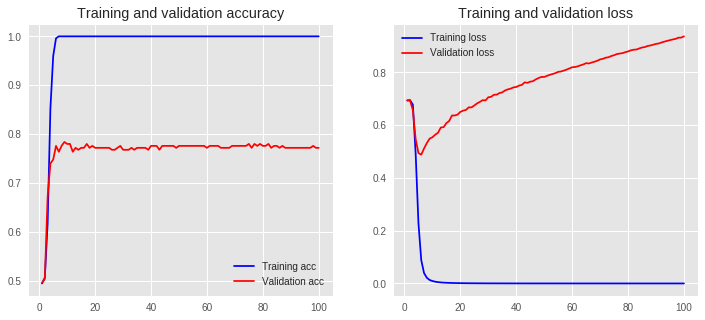

In [0]:
plot_history(history)

In [0]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50


model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           78700     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 79,221
Trainable params: 79,221
Non-trainable params: 0
_________________________________________________________________


In [0]:
epochs = 100
batch_size = 10

history = model.fit(X_train, y_train, epochs=epochs, 
                    validation_data=(X_test, y_test),
                    batch_size=batch_size)

oss, accuracy = model.evaluate(X_train, y_train)
print('Training loss and accuracy', loss, accuracy)

loss, accuracy = model.evaluate(X_test , y_test)
print('Testing loss and accuracy', loss, accuracy)

Train on 750 samples, validate on 250 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/step - loss: 0.6890 - acc: 0.6320 - val_loss: 0.6834 - val_acc: 0.7440
Epoch 2/100
750/750 [==============================] - 0s 636us/step - loss: 0.6565 - acc: 0.7920 - val_loss: 0.6455 - val_acc: 0.7560
Epoch 3/100
750/750 [==============================] - 0s 660us/step - loss: 0.5549 - acc: 0.9253 - val_loss: 0.5461 - val_acc: 0.7800
Epoch 4/100
750/750 [==============================] - 0s 635us/step - loss: 0.3858 - acc: 0.9427 - val_loss: 0.4522 - val_acc: 0.8120
Epoch 5/100
750/750 [==============================] - 0s 655us/step - loss: 0.2427 - acc: 0.9507 - val_loss: 0.4053 - val_acc: 0.8160
Epoch 6/100
750/750 [==============================] - 0s 643us/step - loss: 0.1475 - acc: 0.9707 - val_loss: 0.3863 - val_acc: 0.8240
Epoch 7/100
750/750 [==============================] - 1s 687us/step - loss: 0.0894 - acc: 0.9867 - val_loss: 0.3861 - val_acc: 0.8080
Epoch 8/100

In [0]:
"!wget https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki.en.align.vec"

'!wget https://s3-us-west-1.amazonaws.com/fasttext-vectors/wiki.en.align.vec'

In [0]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    
    with open(filepath) as f:
        next(f)
        for line in f:
            thisline = line.split()
            word, vector = thisline[:len(thisline)-300], thisline[-300:]
            word = " ".join(word)
            assert len(vector) == 300
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
    
    return embedding_matrix

embedding_file = 'wiki.en.align.vec'
embedding_dim = 300
embedding_matrix = create_embedding_matrix(embedding_file, tokenizer.word_index, embedding_dim)

In [0]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print('Number of words which have an embedding {}%'.format(100 * nonzero_elements / vocab_size))

Number of words which have an embedding 93.20203303684879%


In [0]:
from keras.models import Sequential
from keras import layers

embedding_dim = 300


model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                           weights = [embedding_matrix],
                           input_length=maxlen,
                           trainable=True))
#                            trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 300)          472200    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                3010      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 475,221
Trainable params: 475,221
Non-trainable params: 0
_________________________________________________________________


In [0]:
epochs = 10
batch_size = 10

history = model.fit(X_train, y_train, epochs=epochs, 
                    validation_data=(X_test, y_test),
                    batch_size=batch_size)

oss, accuracy = model.evaluate(X_train, y_train)
print('Training loss and accuracy', loss, accuracy)

loss, accuracy = model.evaluate(X_test , y_test)
print('Testing loss and accuracy', loss, accuracy)

Train on 750 samples, validate on 250 samples
Epoch 1/10
750/750 [==============================] - 1s 1ms/step - loss: 0.6888 - acc: 0.5040 - val_loss: 0.6726 - val_acc: 0.5200
Epoch 2/10
750/750 [==============================] - 1s 721us/step - loss: 0.6174 - acc: 0.6000 - val_loss: 0.6012 - val_acc: 0.6720
Epoch 3/10
750/750 [==============================] - 1s 704us/step - loss: 0.4956 - acc: 0.8360 - val_loss: 0.5555 - val_acc: 0.6800
Epoch 4/10
750/750 [==============================] - 1s 724us/step - loss: 0.4074 - acc: 0.9267 - val_loss: 0.5478 - val_acc: 0.7240
Epoch 5/10
750/750 [==============================] - 1s 689us/step - loss: 0.3474 - acc: 0.9720 - val_loss: 0.5423 - val_acc: 0.7520
Epoch 6/10
750/750 [==============================] - 1s 720us/step - loss: 0.3079 - acc: 0.9893 - val_loss: 0.5703 - val_acc: 0.7320
Epoch 7/10
750/750 [==============================] - 1s 712us/step - loss: 0.2800 - acc: 0.9920 - val_loss: 0.5846 - val_acc: 0.7320
Epoch 8/10
750/750

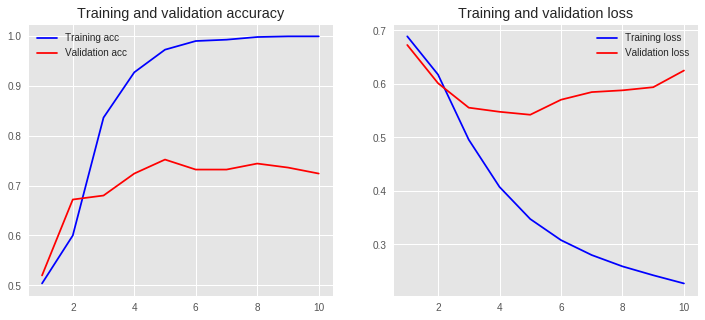

In [0]:
plot_history(history)

In [0]:
embedding_dim = 300


model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                           weights = [embedding_matrix],
                           input_length=maxlen,
#                            trainable=True))
                           trainable=False))
#                           ))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 300)          472200    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           192128    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 665,629
Trainable params: 193,429
Non-trainable params: 472,200
_________________________________________________________________


In [0]:
epochs = 10
batch_size = 10

history = model.fit(X_train, y_train, epochs=epochs, 
                    validation_data=(X_test, y_test),
                    batch_size=batch_size)

oss, accuracy = model.evaluate(X_train, y_train)
print('Training loss and accuracy', loss, accuracy)

loss, accuracy = model.evaluate(X_test , y_test)
print('Testing loss and accuracy', loss, accuracy)

Train on 750 samples, validate on 250 samples
Epoch 1/10
750/750 [==============================] - 2s 3ms/step - loss: 0.6737 - acc: 0.5827 - val_loss: 0.6333 - val_acc: 0.6720
Epoch 2/10
750/750 [==============================] - 1s 842us/step - loss: 0.4914 - acc: 0.8080 - val_loss: 0.4887 - val_acc: 0.7640
Epoch 3/10
750/750 [==============================] - 1s 855us/step - loss: 0.2693 - acc: 0.9200 - val_loss: 0.4298 - val_acc: 0.8000
Epoch 4/10
750/750 [==============================] - 1s 827us/step - loss: 0.1262 - acc: 0.9773 - val_loss: 0.4007 - val_acc: 0.8080
Epoch 5/10
750/750 [==============================] - 1s 858us/step - loss: 0.0480 - acc: 0.9960 - val_loss: 0.4262 - val_acc: 0.8160
Epoch 6/10
750/750 [==============================] - 1s 820us/step - loss: 0.0233 - acc: 1.0000 - val_loss: 0.4276 - val_acc: 0.8160
Epoch 7/10
750/750 [==============================] - 1s 845us/step - loss: 0.0118 - acc: 1.0000 - val_loss: 0.4351 - val_acc: 0.8240
Epoch 8/10
750/750

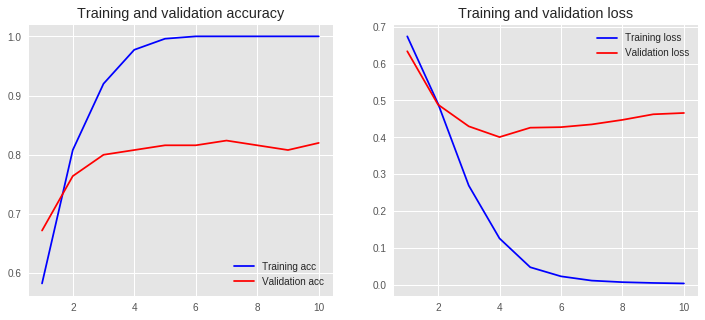

In [0]:
plot_history(history)